In [1]:
import sys
sys.path.append('../src')

from models.ViTL16Model.train_cv import train_cv as train_ViTL16Model
from models.ViTL16Model.predict import predict as predict_ViTL16Model

from utils.show_graph import plot_history

d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
package_model_path, loss_history, auc_history = train_ViTL16Model(
    num_epochs=5,
    learning_rate=1e-05,
    batch_size=4,
    n_splits=5,
    use_flozen=True,
    seed=59123
)

[DEBUG] 2023-09-28 02:17:33 - Batch size: 4
[DEBUG] 2023-09-28 02:17:33 - Learning rate: 1e-05
[DEBUG] 2023-09-28 02:17:33 - Number of epochs: 5
[DEBUG] 2023-09-28 02:17:33 - Seed: 59123
[DEBUG] 2023-09-28 02:17:33 - Minimum learning rate: 1e-06
[DEBUG] 2023-09-28 02:17:33 - Number of splits: 5
[DEBUG] 2023-09-28 02:17:33 - Pretrained: True
[DEBUG] 2023-09-28 02:17:33 - Use flozen: True
[DEBUG] 2023-09-28 02:17:33 - Start fold: 0
d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\albumentations\augmentations\dropout\cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
[DEBUG] 2023-09-28 02:17:33 - Fold: 1/5
[DEBUG] 2023-09-28 02:17:33 - ----------------------------------------
[DEBUG] 2023-09-28 02:17:36 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-28 02:17:36 - Starting training on cuda at 2023-09-28 02:17:36
[DEBUG] 2023-09-28 02:17:36 - Model: VisionTransformer
[DEBUG] 2023-09-28 02:17:36 - Model parameters:
[D

In [3]:
for path in package_model_path:
    print(path)

d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230928021736_epoch_5_auc_0.8983.pth
d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230928025134_epoch_5_auc_0.9059.pth
d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230928033519_epoch_4_auc_0.8893.pth
d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230928041822_epoch_4_auc_0.8950.pth
d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230928050446_epoch_5_auc_0.8966.pth


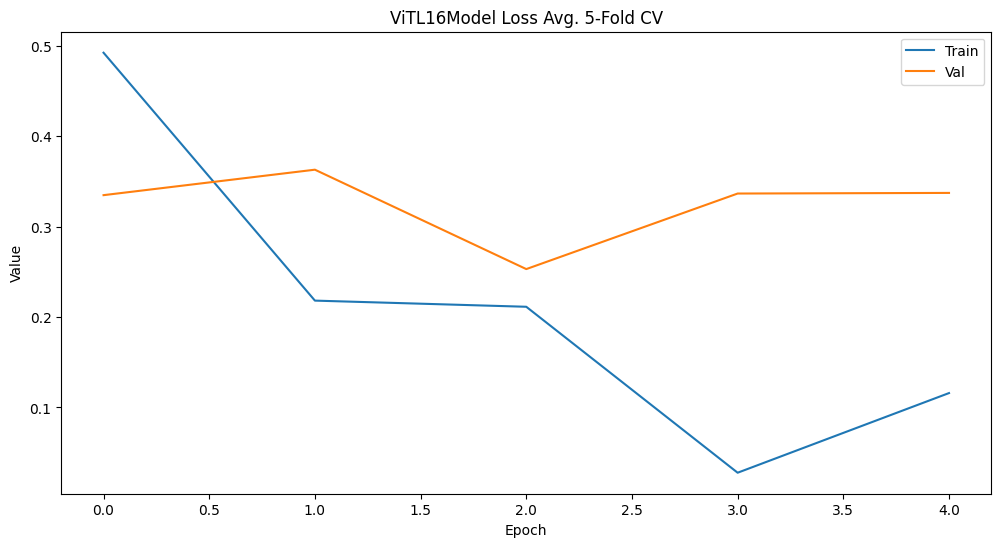

In [3]:
plot_history(loss_history, "ViTL16Model Loss Avg. 5-Fold CV")

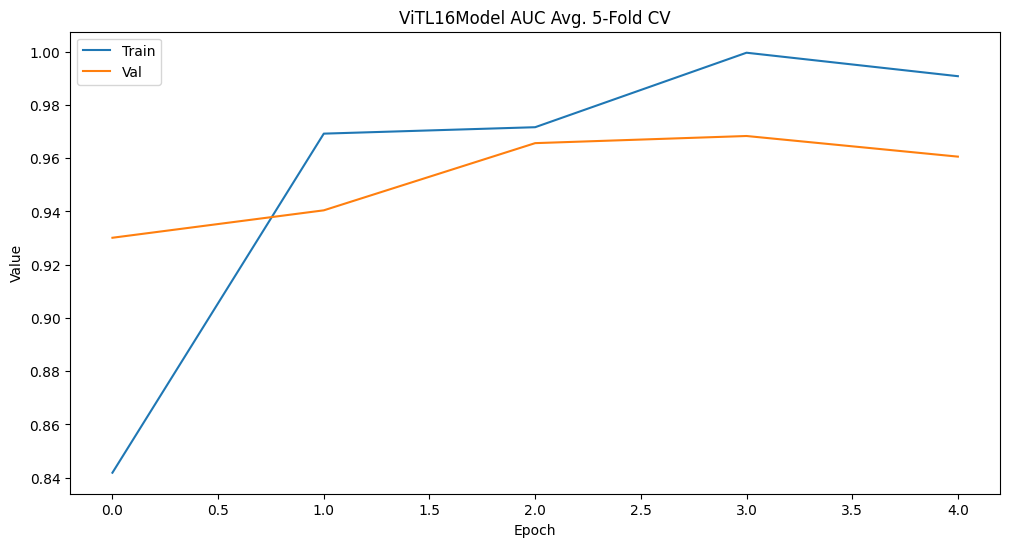

In [4]:
plot_history(auc_history, "ViTL16Model AUC Avg. 5-Fold CV")

In [5]:
best_auc_model_paths = package_model_path
[
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927181438_epoch_4_auc_0.9742.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927184238_epoch_4_auc_0.9689.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927192652_epoch_3_auc_0.9781.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927200932_epoch_5_auc_0.9597.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927205912_epoch_4_auc_0.9748.pth"
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_ViTL16Model(
    model_path=best_auc_model_path,
    batch_size=4,
    seed=59123,
    use_tta=False
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_vitl16model_ensamble_202309281218_59123_5fold_100layer_rev_55445epoch.csv', index=False, header=False)

[DEBUG] 2023-09-28 12:22:01 - Starting prediction on cuda
[DEBUG] 2023-09-28 12:22:01 - Using TTA: False
[DEBUG] 2023-09-28 12:22:01 - TTA Transforms: <ttach.base.Compose object at 0x000001C259F6E350>
Prediction: 100%|██████████| 545/545 [02:23<00:00,  3.80it/s]
[DEBUG] 2023-09-28 12:24:24 - Finished prediction
[DEBUG] 2023-09-28 12:24:28 - Starting prediction on cuda
[DEBUG] 2023-09-28 12:24:28 - Using TTA: False
[DEBUG] 2023-09-28 12:24:28 - TTA Transforms: <ttach.base.Compose object at 0x000001C280576410>
Prediction: 100%|██████████| 545/545 [02:22<00:00,  3.81it/s]
[DEBUG] 2023-09-28 12:26:51 - Finished prediction
[DEBUG] 2023-09-28 12:26:55 - Starting prediction on cuda
[DEBUG] 2023-09-28 12:26:55 - Using TTA: False
[DEBUG] 2023-09-28 12:26:55 - TTA Transforms: <ttach.base.Compose object at 0x000001C280546BD0>
Prediction: 100%|██████████| 545/545 [02:22<00:00,  3.81it/s]
[DEBUG] 2023-09-28 12:29:18 - Finished prediction
[DEBUG] 2023-09-28 12:29:21 - Starting prediction on cuda
[DE

In [4]:
best_auc_model_paths = [
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927181438_epoch_3_auc_0.9619.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927184238_epoch_3_auc_0.9646.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927192652_epoch_3_auc_0.9781.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927200932_epoch_3_auc_0.9554.pth",
  "d:/repo/tkser/technopro-food-package/src/data/models/ViTL16Model_cv/visiontransformer_20230927205912_epoch_3_auc_0.9681.pth"
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_ViTL16Model(
    model_path=best_auc_model_path,
    batch_size=4,
    seed=59123,
    use_tta=False
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_vitl16model_ensamble_202309272245_59123_5fold_100layer_33333epoch.csv', index=False, header=False)

[DEBUG] 2023-09-28 12:20:50 - Starting prediction on cuda
[DEBUG] 2023-09-28 12:20:50 - Using TTA: False
[DEBUG] 2023-09-28 12:20:50 - TTA Transforms: <ttach.base.Compose object at 0x000001C259F9F350>
Prediction:  26%|██▌       | 141/545 [00:37<01:48,  3.74it/s]


KeyboardInterrupt: 